In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Simulate data
np.random.seed(42)
data_size = 1000
data = pd.DataFrame({
    'customer_id': np.arange(1, data_size + 1),
    'age': np.random.randint(18, 70, size = data_size),
    'annual_income': np.random.randint(20000, 150000, size = data_size),
    'spending_score': np.random.randint(1, 100, size = data_size),
    'loyalty_points': np.random.randint(1, 1000, size = data_size)
})

data.head()

,customer_id,age,annual_income,spending_score,loyalty_points
0,1,56,125186,58,397
1,2,69,54674,67,625
2,3,46,55854,56,105
3,4,32,66271,40,192
4,5,60,93688,98,17


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     1000 non-null   int64
 1   age             1000 non-null   int32
 2   annual_income   1000 non-null   int32
 3   spending_score  1000 non-null   int32
 4   loyalty_points  1000 non-null   int32
dtypes: int32(4), int64(1)
memory usage: 23.6 KB


In [5]:
data.describe()

,customer_id,age,annual_income,spending_score,loyalty_points
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,84905.976000,49.064000,514.286000
std,288.819436,14.99103,38430.889006,28.857281,284.453026
min,1.000000,18.00000,20060.000000,1.000000,1.000000
25%,250.750000,31.00000,51945.500000,24.000000,265.000000
50%,500.500000,44.00000,84699.000000,47.000000,526.500000
75%,750.250000,56.00000,117858.000000,75.000000,763.000000
max,1000.000000,69.00000,149972.000000,99.000000,998.000000


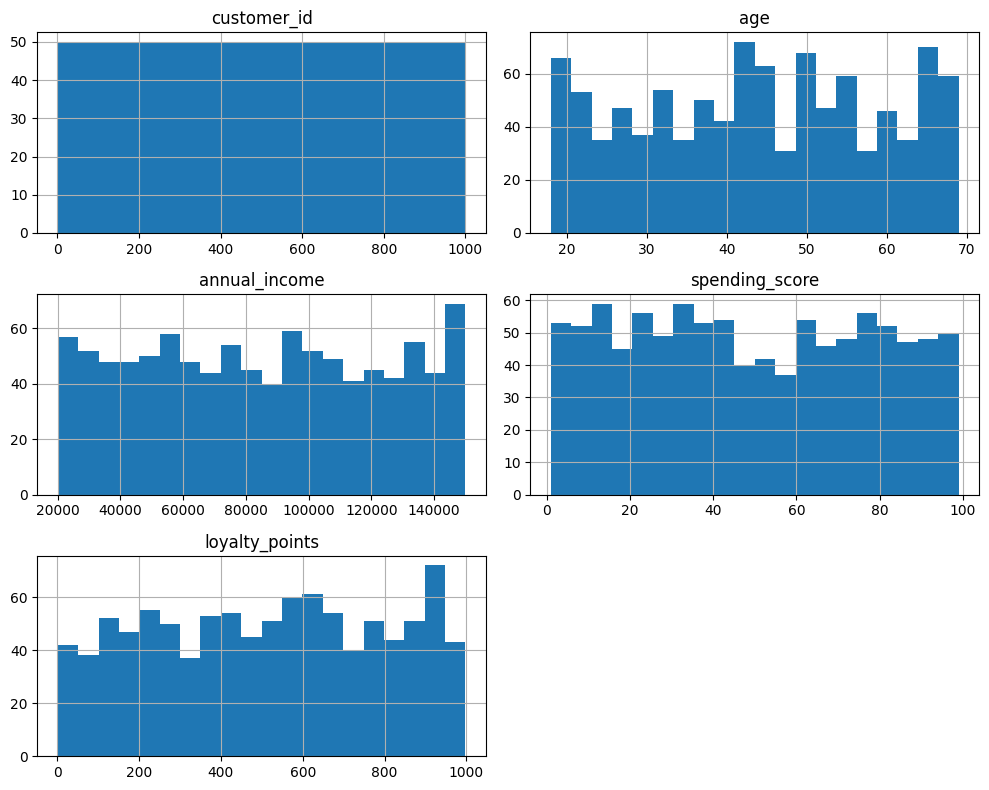

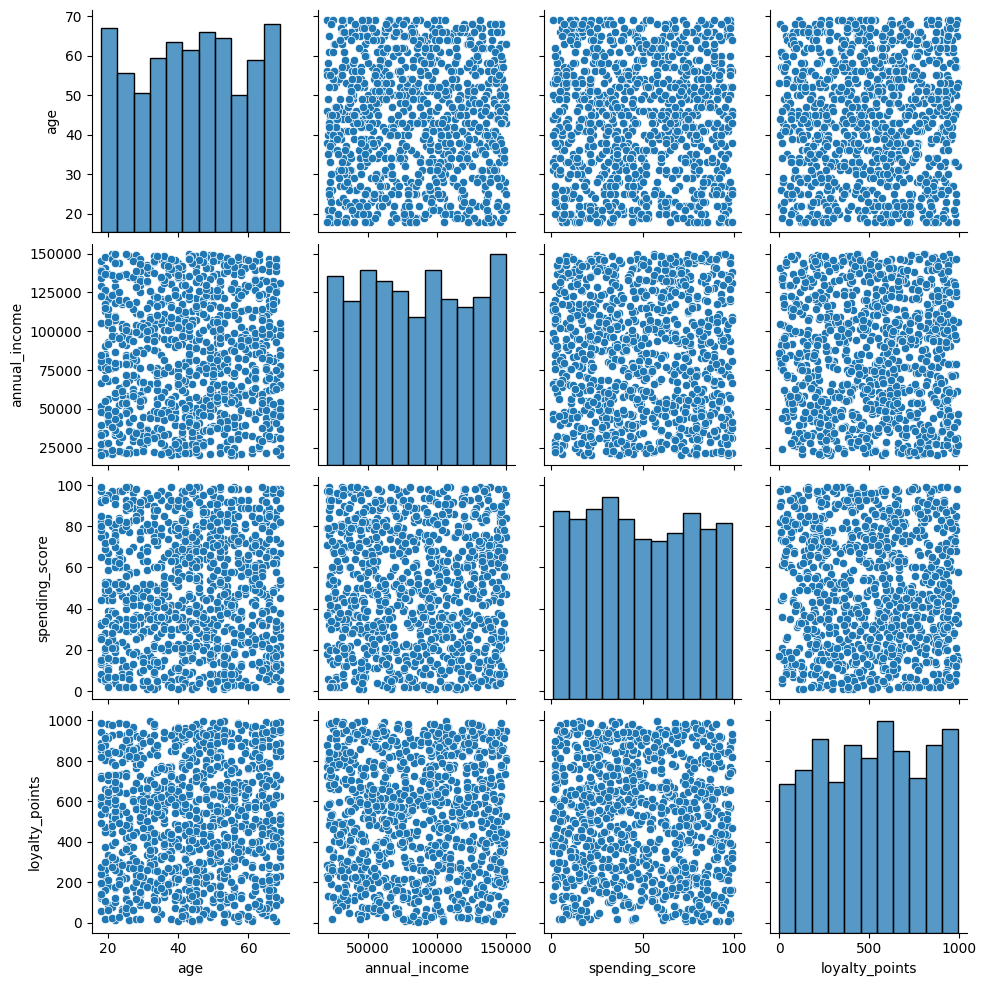

In [7]:
#Histograms
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

#Pairplot
sns.pairplot(data[['age', 'annual_income', 'spending_score', 'loyalty_points']])
plt.show()

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['age', 'annual_income', 'spending_score', 'loyalty_points']])

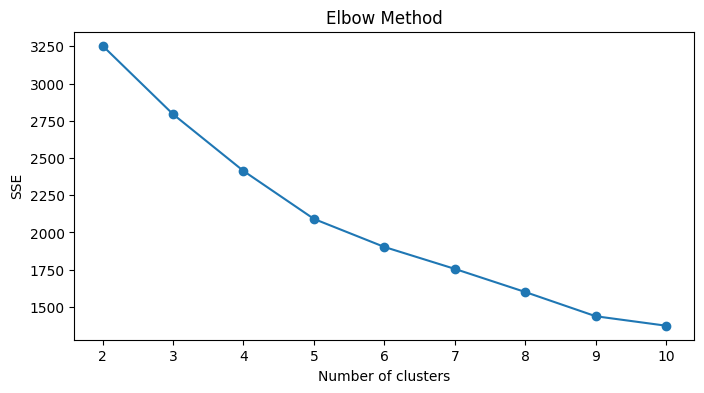

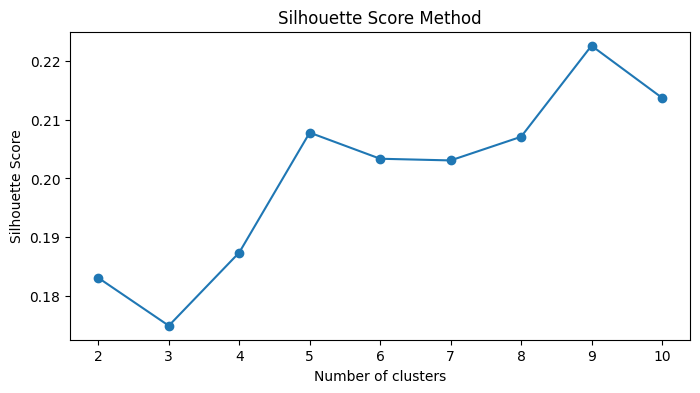

In [11]:
sse = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))
    
#Elbow plot
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

#Silhouette score plot
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [12]:
optimal_k = 4 #Based on the analysis above
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

In [13]:
cluster_profiles = data.groupby('cluster').mean().reset_index()
cluster_profiles

,cluster,customer_id,age,annual_income,spending_score,loyalty_points
0,0,483.385542,43.104418,125388.337349,45.148594,315.301205
1,1,534.923387,32.500000,77311.987903,34.000000,734.177419
2,2,479.340164,41.176230,51978.372951,60.352459,261.077869
3,3,503.926641,57.833977,84278.702703,56.617761,733.579151


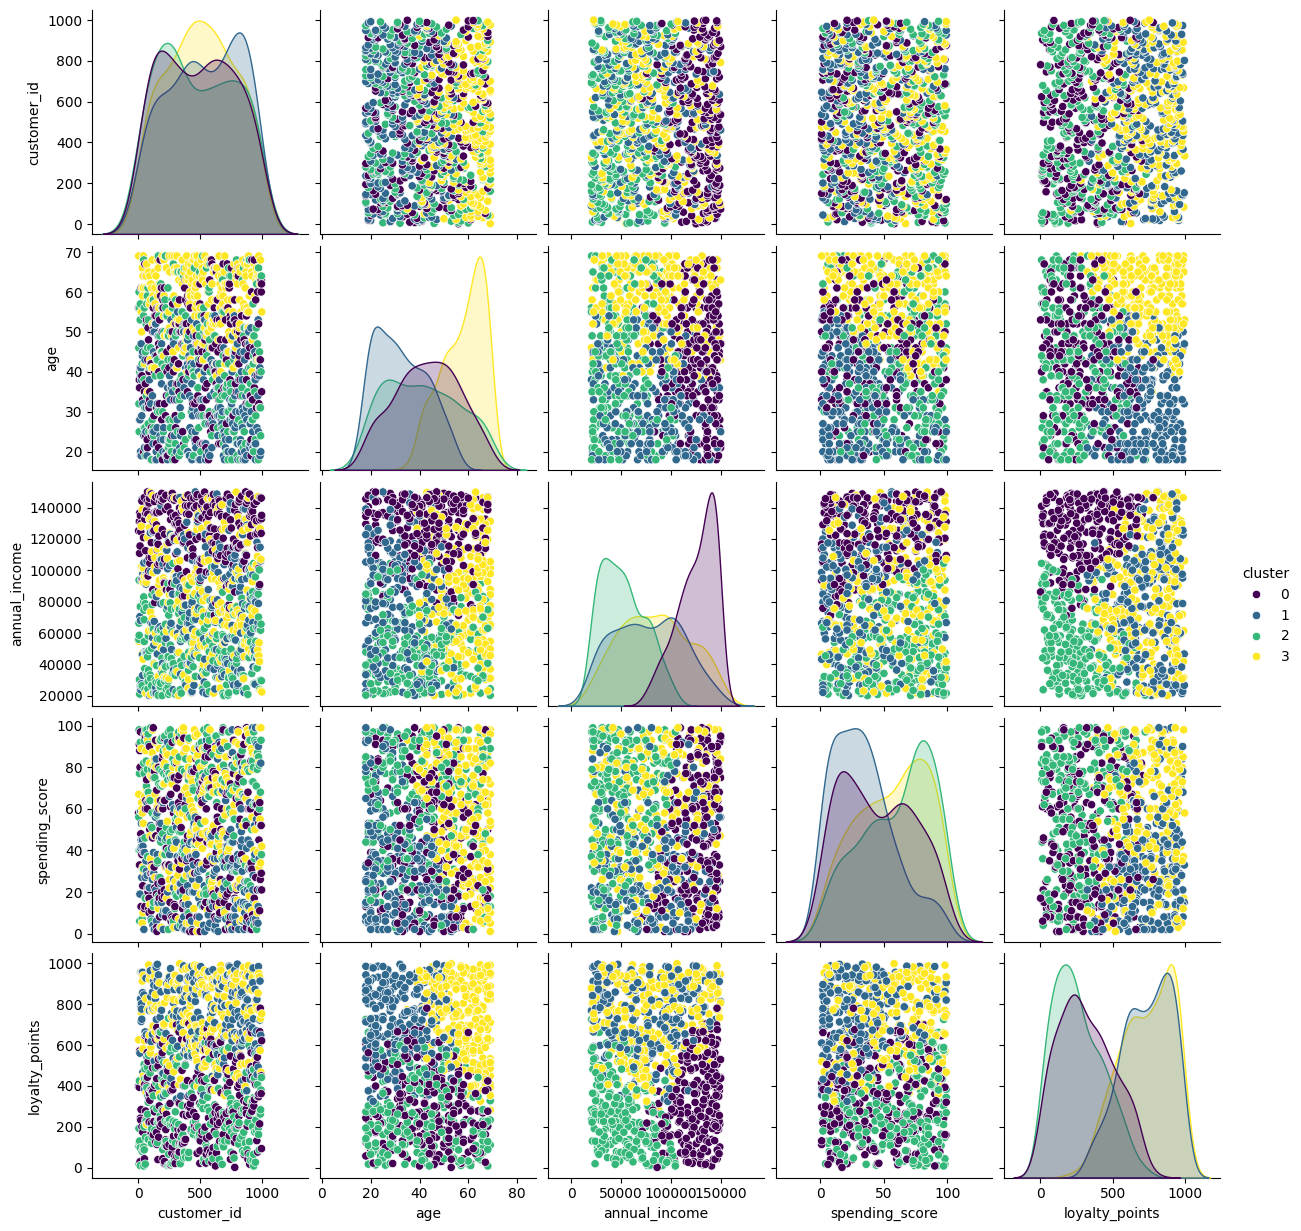

In [14]:
sns.pairplot(data, hue='cluster', palette='viridis')
plt.show()

# Customer Segmentation Analysis

**Objective**: To identify distinct customer segments based on their demographics and behavior.

**Methodology**:
- Data Collection: Simulated customer data.
- Data Preprocessing: Standardized the features.
- Clustering: Used KMeans clustering with an optimal number of clusters determined by the elbow method and silhouette score.

**Results**:
- Identified 4 distinct customer segments.
- Each segment is characterized by different demographics and behavior patterns.

**Recommendations**:
- Target Segment A with premium offers.
- Improve engagement for Segment B through loyalty programs.
